# Import

In [2]:

import numpy as np
from scipy.special import comb
import random as rd
import matplotlib.pyplot as plt

import networkx as nx

# Example: small circulation graph

[0, 1, 2]


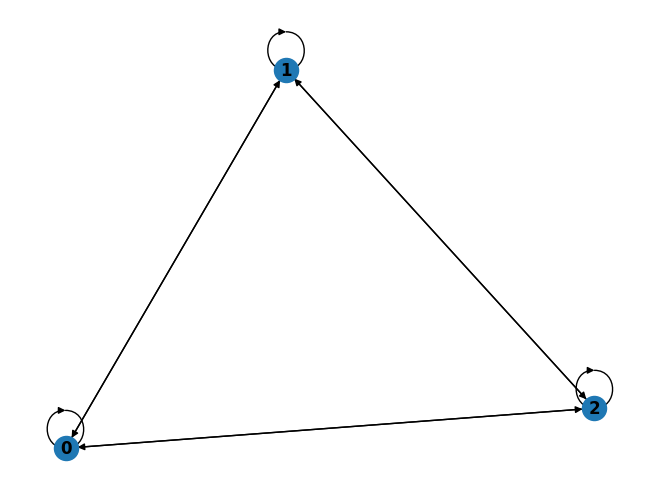

In [30]:
DG = nx.DiGraph()
nb_colonies = 3
migration_rate = 0.1
M = 4



In [26]:
DG.successors(0)
DG.edges[2,2]['weight']

0.8

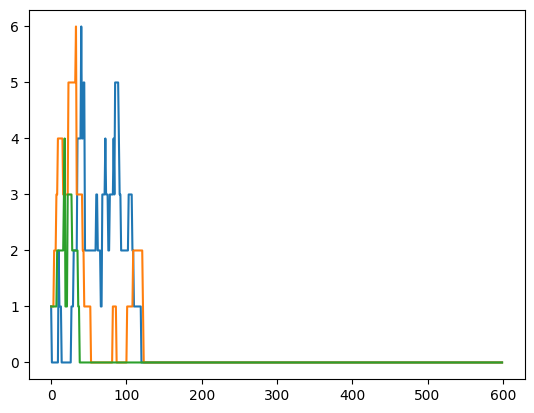

In [41]:
s = 0.01
tmax = 600


b = True
t = 1


i_nodes = np.array([1 for i in range(nb_colonies)]) # list of the number of mutants in each node
N_nodes = np.array([10 for i in range(nb_colonies)]) # list of the population size in each node
M_nodes = np.array([M for i in range(nb_colonies)]) # list of the update size in each node
DG.add_nodes_from(list(range(nb_colonies)))


#adding weighted edges
for node1 in DG.nodes:
    for node2 in DG.nodes:
        if node1==node2:
            weight = 1 - (nb_colonies-1)*migration_rate
        else:
            weight = migration_rate
        DG.add_weighted_edges_from([(node1, node2, weight)])


trajectories = np.zeros((tmax,nb_colonies))
trajectories[0,:] = i_nodes

while t<tmax and b :
    #choose randomly one node
    selected_node = rd.randint(0, nb_colonies-1)

    #perform hypergeometrical sampling
    ngood = i_nodes[selected_node]
    nbad = N_nodes[selected_node] - ngood
    nb_mutants_before_update = np.random.hypergeometric(ngood, nbad, M_nodes[selected_node])

    # perform binomial sampling 
    num = sum([i_nodes[node] * (1+s) * DG.edges[node, selected_node]['weight']  for node in list(DG.successors(selected_node))])
    denom = num + sum([(N_nodes[node] - i_nodes[node])*DG.edges[node,selected_node]['weight'] for node in list(DG.successors(selected_node))])
    prob = num/denom
    n_trials = M_nodes[selected_node]
    nb_mutants_after_update = np.random.binomial(n_trials, prob)

    # update nb of mutants in the node
    i_nodes[selected_node] = ngood - nb_mutants_before_update + nb_mutants_after_update

    trajectories[t,:] = i_nodes

    t += 1
    b = sum(i_nodes) < sum(N_nodes) and (i_nodes > 0).any()

if t<tmax:
    fixation = sum(i_nodes) == sum(N_nodes)
        
    for tt in range(t,tmax):
        trajectories[tt,:] = trajectories[t-1,:]


xx = list(range(tmax))
for k in range(nb_colonies):
    yy = trajectories[:,k]
    plt.plot(xx, yy)    



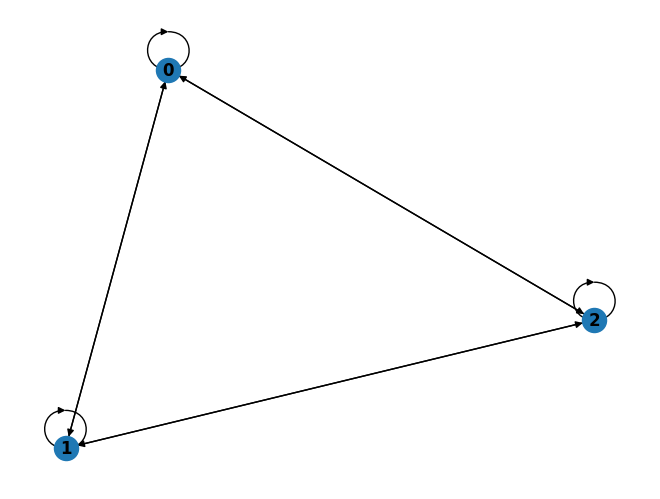

In [33]:
nx.draw(DG, with_labels=True, font_weight='bold')
